In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn import metrics as m
from warnings import filterwarnings
from collections import namedtuple
%matplotlib notebook

In [2]:
filterwarnings(action="ignore")

In [3]:
sns.set_style("whitegrid")

In [4]:
r2 = lambda x: round(x,2)

In [5]:
idf = pd.read_csv("insurance.csv")

In [6]:
idf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
idf = idf[['age', 'bmi', 'children', 'sex', 'smoker', 'region', 'expenses']]

In [8]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   sex       1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
idf.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<IPython.core.display.Javascript object>


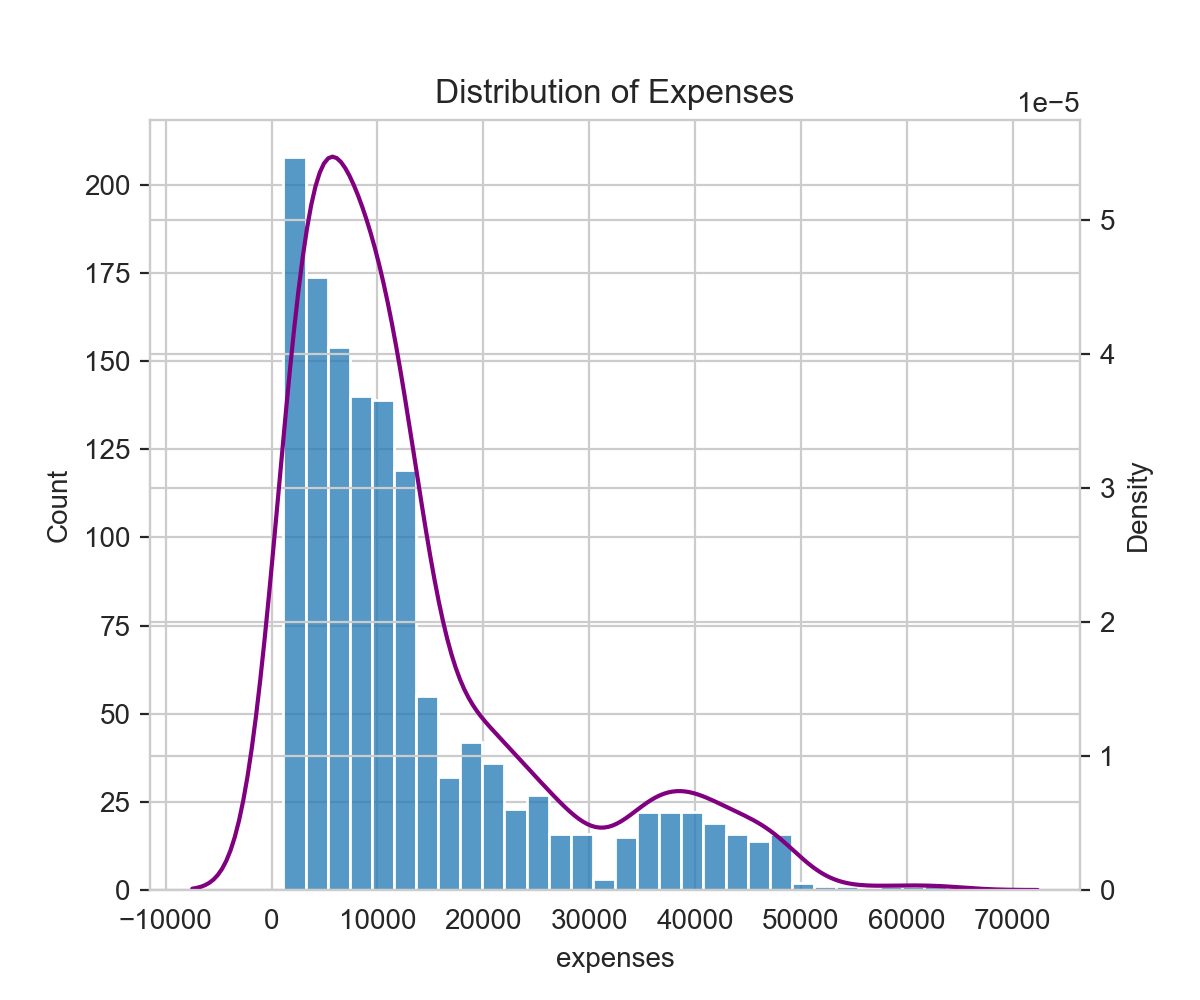

Skewness: 1.51


In [10]:
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(idf.expenses)
ax2 = ax.twinx()
sns.kdeplot(idf.expenses,color="purple",ax=ax2)
plt.title("Distribution of Expenses")
plt.show()
print("Skewness: {}".format(r2(stats.skew(idf.expenses))))

<IPython.core.display.Javascript object>


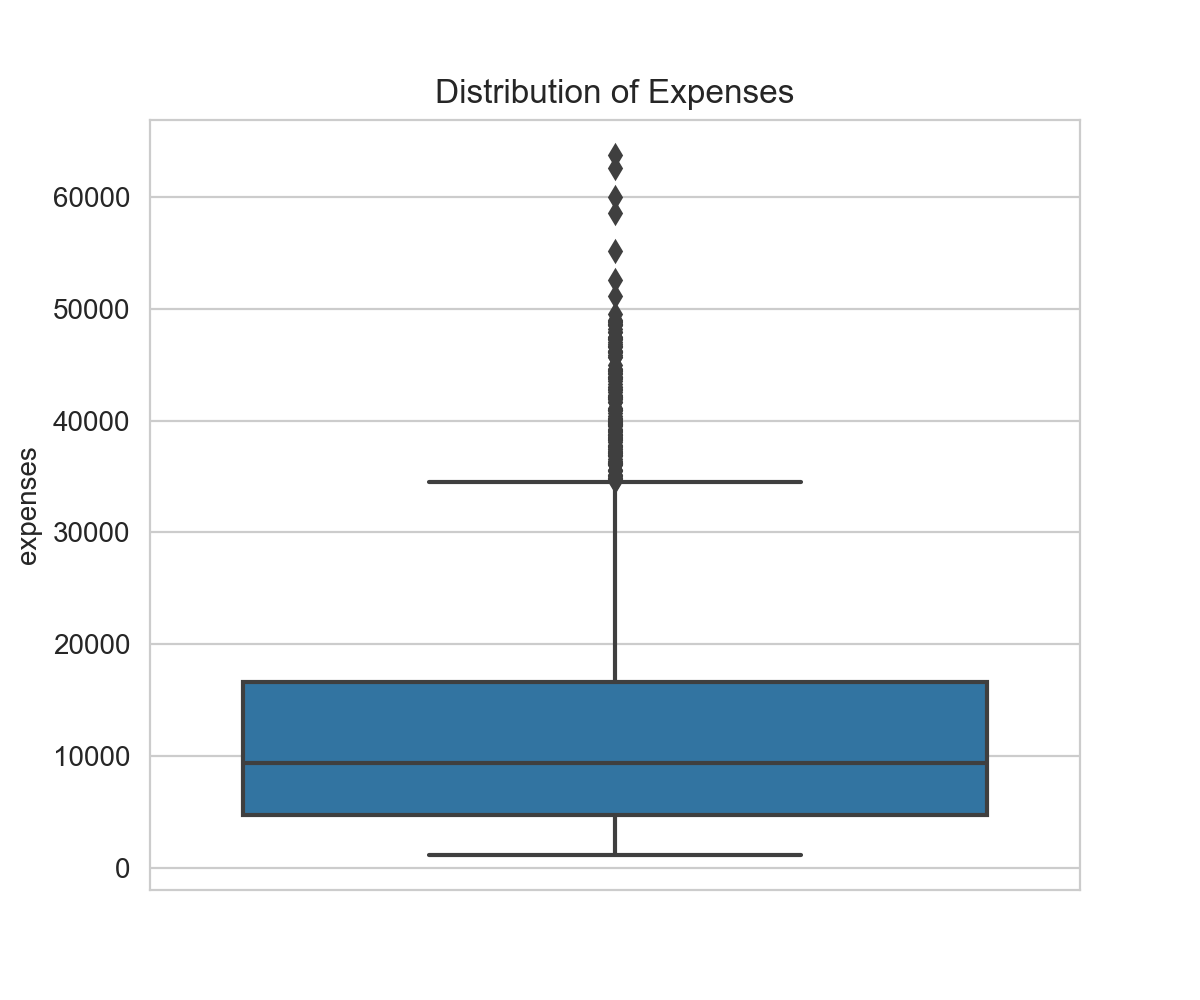

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(data=idf,y="expenses")
plt.title("Distribution of Expenses")
plt.show()

In [12]:
idf.groupby(by="sex").describe()["expenses"]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578897,11128.703817,1607.51,4885.1625,9412.965,14454.690,63770.43
male,676.0,13956.751420,12971.025897,1121.87,4619.1350,9369.615,18989.595,62592.87


<IPython.core.display.Javascript object>


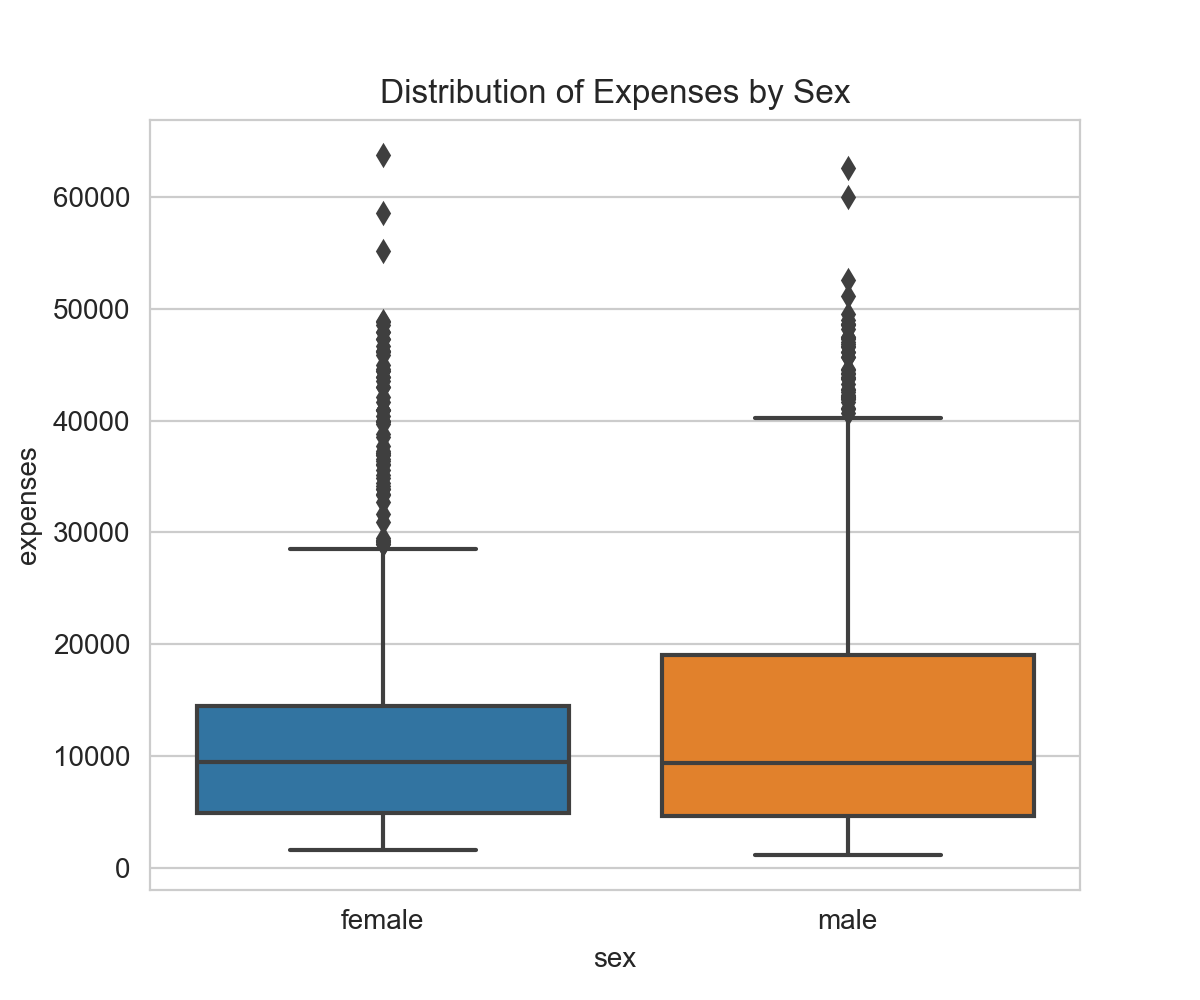

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(data=idf,x="sex",y="expenses")
plt.title("Distribution of Expenses by Sex")
plt.show()

In [14]:
idf.groupby(by="smoker").describe()["expenses"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


<IPython.core.display.Javascript object>


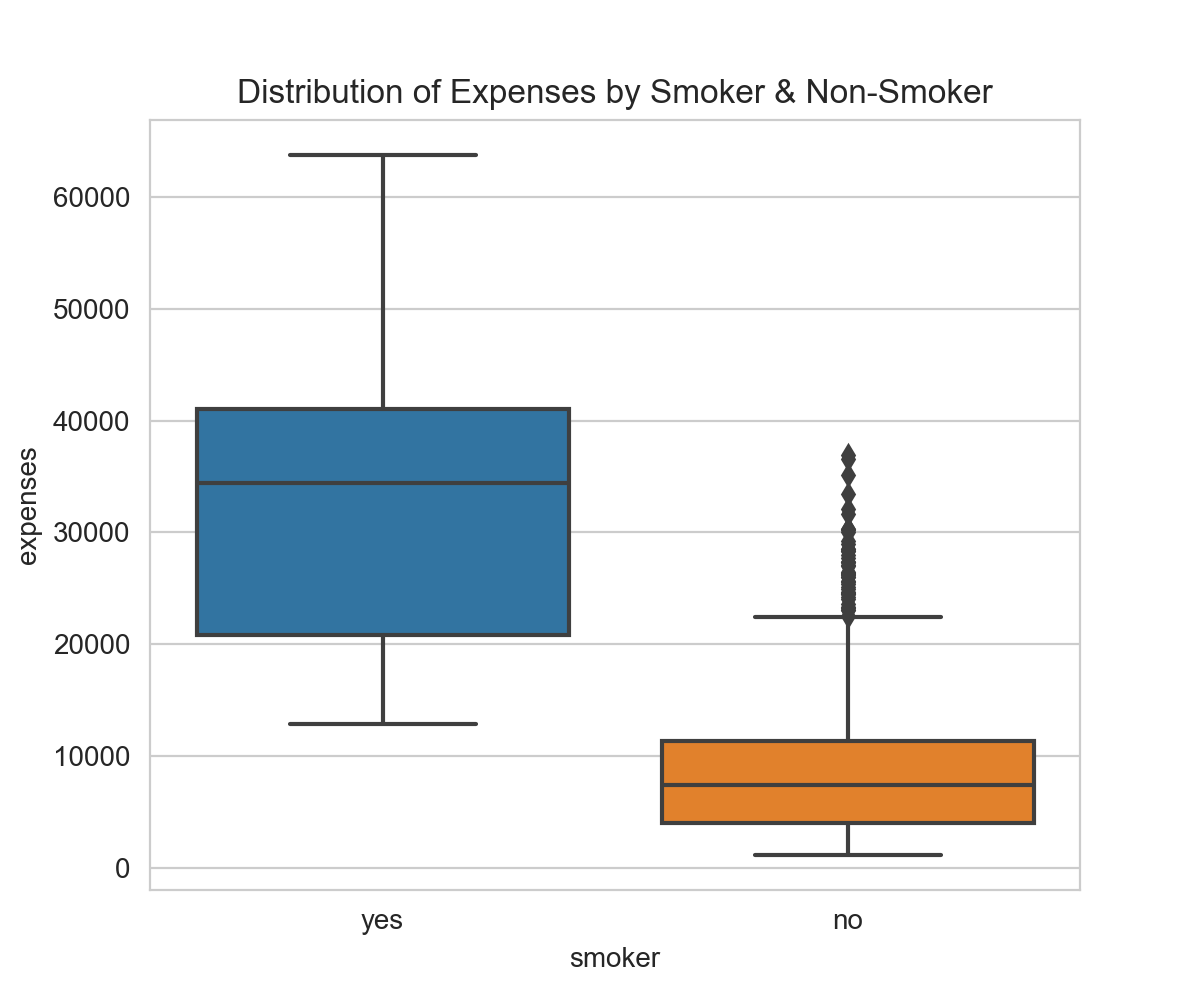

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(data=idf,x="smoker",y="expenses")
plt.title("Distribution of Expenses by Smoker & Non-Smoker")
plt.show()

In [16]:
idf.groupby(by="children").describe()["expenses"]

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975767,12023.294017,1121.87,2734.4200,9856.950,14440.1200,63770.43
1,324.0,12731.171821,11823.631341,1711.03,4791.6450,8483.870,15632.0475,58571.07
2,240.0,15073.564000,12891.368314,2304.00,6284.9375,9264.980,20379.2750,49577.66
3,157.0,15355.318535,12330.869474,3443.06,6652.5300,10600.550,19199.9400,60021.40
4,25.0,13850.656800,9139.223594,4504.66,7512.2700,11033.660,17128.4300,40182.25
5,18.0,8786.035556,3808.434648,4687.80,5874.9750,8589.565,10019.9450,19023.26


<IPython.core.display.Javascript object>


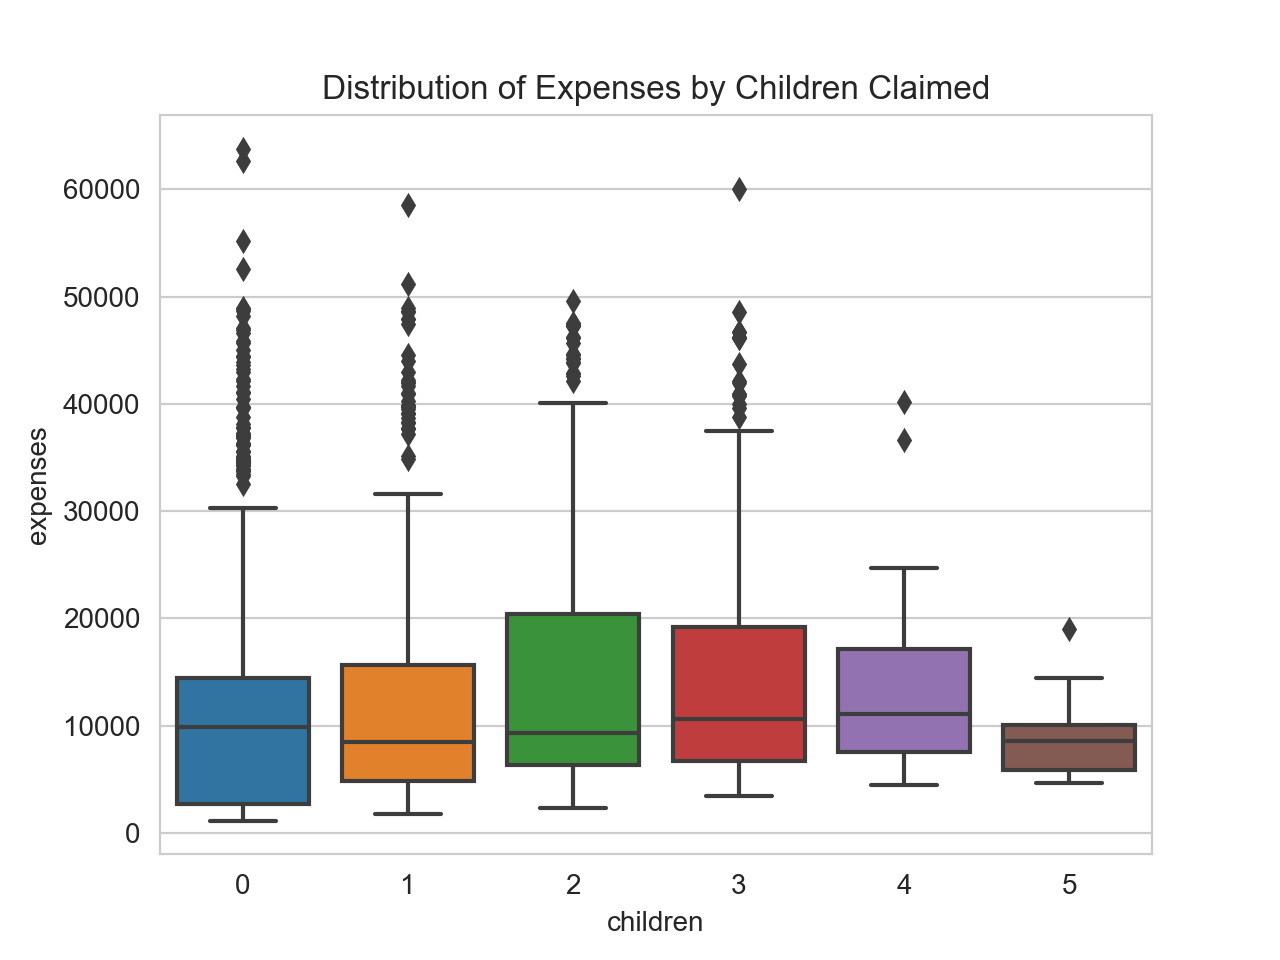

In [17]:
plt.figure()
sns.boxplot(data=idf,x="children",y="expenses")
plt.title("Distribution of Expenses by Children Claimed")
plt.show()

<IPython.core.display.Javascript object>


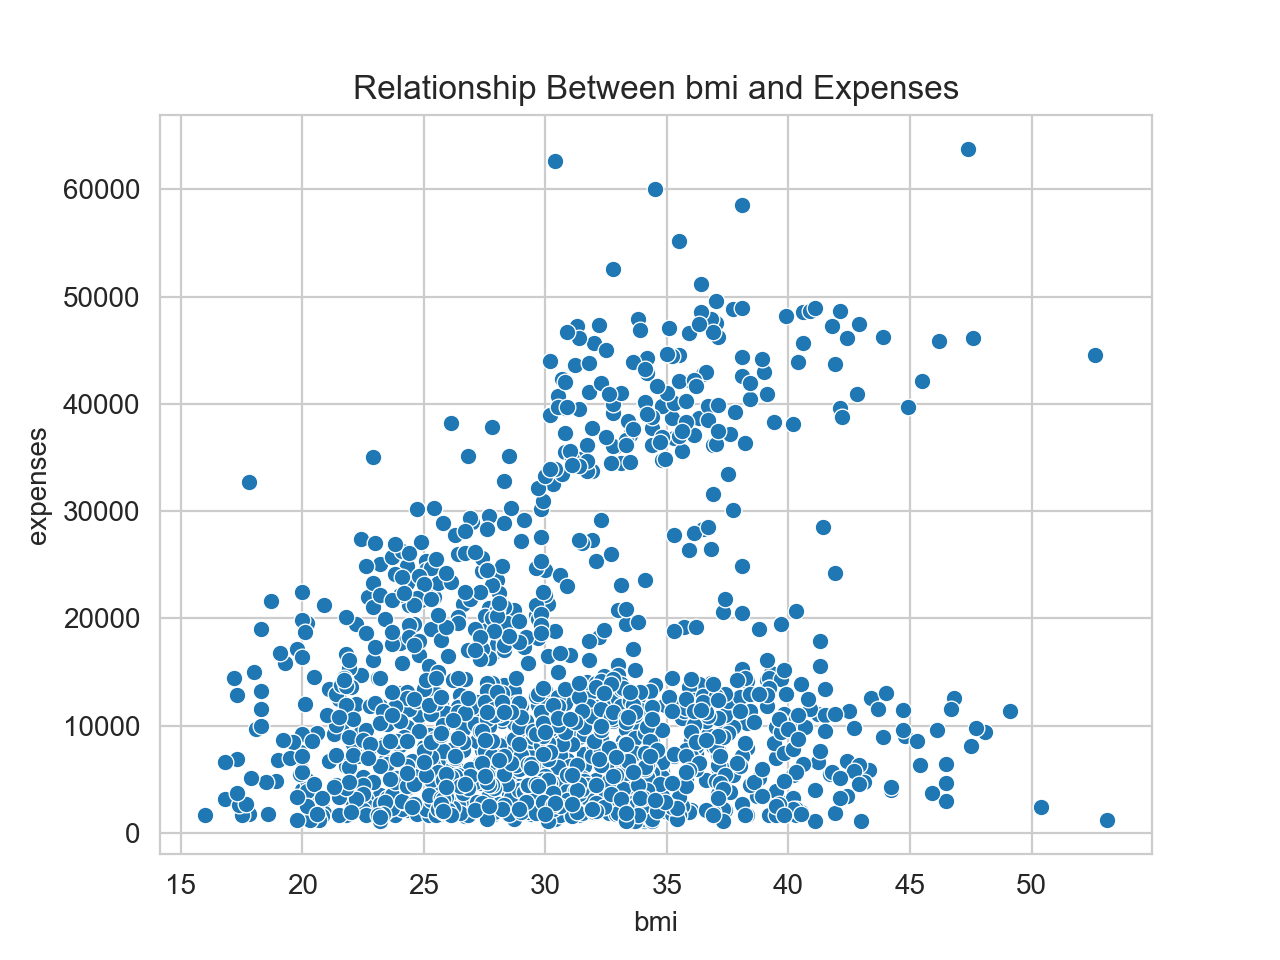

Pearson Correlation Coefficient: 0.2


In [18]:
plt.figure()
sns.scatterplot(data=idf,x="bmi",y="expenses")
plt.title("Relationship Between bmi and Expenses")
plt.show()
print("Pearson Correlation Coefficient: {}".format(r2(stats.pearsonr(idf.bmi,idf.expenses)[0])))

# Support Vector Regression

In [19]:
X = idf.iloc[:,:-1].values
y = idf.iloc[:,-1].values

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [21]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),np.arange(3,6))], remainder="passthrough")

In [22]:
X_train = pd.DataFrame(ct.fit_transform(X_train)).drop(columns=[1,3,5]).values
X_test = pd.DataFrame(ct.fit_transform(X_test)).drop(columns=[1,3,5]).values

In [23]:
X_sc = StandardScaler()
y_sc = StandardScaler()

In [24]:
X_train[:,5:] = X_sc.fit_transform(X_train[:,5:])
X_test[:,5:] = X_sc.fit_transform(X_test[:,5:])
y_train = y_sc.fit_transform(y_train.reshape(-1,1))

In [25]:
sv_regress = SVR(kernel="rbf")

In [26]:
sv_regress.fit(X_train,y_train)

SVR()

In [27]:
ypred = y_sc.inverse_transform(sv_regress.predict(X_test))

In [28]:
svm_acc = r2(m.r2_score(y_test,ypred))

In [29]:
svm_acc

0.89

In [30]:
m.mean_squared_error(y_test,ypred)

16036867.901457977

# Multiple Linear Regression

In [31]:
X = idf.iloc[:,:-1].values
y = idf.iloc[:,-1].values

In [32]:
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),np.arange(3,6))], remainder="passthrough")

In [33]:
X = pd.DataFrame(ct.fit_transform(X)).drop(columns=[1,3,5]).values

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [35]:
mvlm = LinearRegression()

In [36]:
mvlm.fit(X_train, y_train)

LinearRegression()

In [37]:
ypred = mvlm.predict(X_test)

In [38]:
mvlm_acc = r2(m.r2_score(y_test,ypred))

In [39]:
mvlm_acc

0.79

In [40]:
m.mean_squared_error(y_test,ypred)

30712099.719091155

# Decission Tree

In [41]:
X = idf.iloc[:,:-1].values
y = idf.iloc[:,-1].values

In [42]:
ct = ColumnTransformer([("encoder",OneHotEncoder(),np.arange(3,6))], remainder="passthrough")

In [43]:
X = pd.DataFrame(ct.fit_transform(X)).drop(columns=[1,3,5]).values

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [45]:
dt = DecisionTreeRegressor(random_state=112)

In [46]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=112)

In [47]:
ypred =  dt.predict(X_test)

In [48]:
dc_acc = r2(m.r2_score(y_test,ypred))

In [49]:
dc_acc

0.81

In [50]:
m.mean_squared_error(y_test, ypred)

27431965.599070147

# Random Forest

In [51]:
X = idf.iloc[:,:-1].values
y = idf.iloc[:,-1].values

In [52]:
ct = ColumnTransformer([("encoder",OneHotEncoder(),np.arange(2,6))], remainder="passthrough")

In [53]:
X = pd.DataFrame(ct.fit_transform(X)).drop(columns=[1,3,5]).values

In [54]:
forest_model = RandomForestRegressor(n_estimators=300,random_state=112)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=112,test_size=0.25)

In [56]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=112)

In [57]:
ypred = forest_model.predict(X_test)

In [58]:
forest_acc = r2(m.r2_score(y_test,ypred))

In [59]:
forest_acc

0.88

# Compare Models

In [60]:
models = namedtuple("Compare_Models",["Support_Vector_Machine", "Multivariate_Linear_Regression"
                                     ,"Decision_Tree", "Random_Forest"])

In [61]:
models = models(svm_acc,mvlm_acc,dc_acc,forest_acc)

In [62]:
models

Compare_Models(Support_Vector_Machine=0.89, Multivariate_Linear_Regression=0.79, Decision_Tree=0.81, Random_Forest=0.88)